In [3]:
from graphviz import Digraph


def plot_model(tree, name):
    g = Digraph("G", filename=name, format='png', strict=False)
    first_label = list(tree.keys())[0]
    g.node("0", first_label)
    _sub_plot(g, tree, "0")
    g.view()


root = "0"


def _sub_plot(g, tree, inc):
    global root

    first_label = list(tree.keys())[0]
    ts = tree[first_label]
    for i in ts.keys():
        if isinstance(tree[first_label][i], dict):
            root = str(int(root) + 1)
            g.node(root, list(tree[first_label][i].keys())[0])
            g.edge(inc, root, str(i))
            _sub_plot(g, tree[first_label][i], root)
        else:
            root = str(int(root) + 1)
            g.node(root, tree[first_label][i])
            g.edge(inc, root, str(i))


d1 = {"no surfacing": {0: "no", 1: {"flippers": {0: "no", 1: "yes"}}}}

d2 = {"'哈哈'": {'怕怕': 'no lenses', 'normal': {'astigmatic': {'yes': {
    'prescript': {'myope': 'hard', 'hyper': {'age': {'young': 'hard', 'presbyopic': 'no lenses', 'pre': 'no lenses'}}}},
    'no': {'age': {'young': 'soft', 'presbyopic': {
        'prescript': {'myope': 'no lenses',
                      'hyper': 'soft'}},
                   'pre': 'soft'}}}}}}

plot_model(d1, "hello.gv")
plot_model(d2, "hello2.gv")

ModuleNotFoundError: No module named 'graphviz'

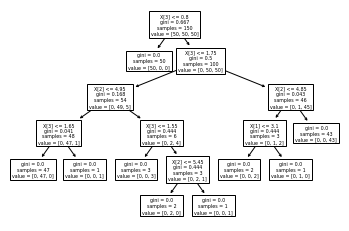

In [9]:
from sklearn.datasets import load_iris

from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)
dot_data=tree.export_graphviz(clf,out_file="dd",
                              feature_names=iris.feature_names,
                              class_names=True,filled=True,rounded=True)
